### ALL POPULAR BOYS NAMES--Used COLAB

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 39.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import statsmodels
import pmdarima as pmd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
males_pop=pd.read_csv('/content/drive/MyDrive/Data/popular_males.csv', parse_dates =['year'], index_col="year")
male_names = pd.read_csv("/content/drive/MyDrive/Data/male_names.csv",  parse_dates =['year'], index_col="year")
names_100_years = pd.read_csv("/content/drive/MyDrive/Data/males_100count_10years_1920.csv", parse_dates =['year'], index_col="year")

### Pull all popular boy names in a list/size it

In [5]:
males_name_list = males_pop["name"].unique().tolist()

In [6]:
len(males_name_list)

649

### Find all popular boys names with at least 10 years of data in the dataset of 1920-2020

In [7]:

grouping= {}
group_list =[]
def name_ten_years(names,df):
    for name in names:
        
        Z=df[df["name"]==name][["count"]]
        
        grouping.update({name:Z.shape[0]})
    
        
    for k,v in sorted(grouping.items(), key=lambda x:x[1],reverse=True):
        if v <=10:
            group_list.append(k)
    
        df_dropped = df[~df["name"].isin(group_list)]
    
    return df_dropped

In [8]:
new_pop_males = name_ten_years(males_name_list, males_pop)

In [9]:
pop_males_list = new_pop_males["name"].unique().tolist()

In [10]:
len(pop_males_list)

484

### RUN ARIMA PREDICTION MODEL ON DATASET FULL DATASET (1880-2020)

In [14]:
my_dict ={}
dict_list=[]

def name_modeler_scores(names, df):

    for name in names:
        
    
        Z = df[df["name"]==name][['count']]

        
        train, test = train_test_split(Z, shuffle=False, test_size=.30)
        
        df_preds = test.copy(deep=True)
        
        df_preds["baseline"]=train["count"][-1]
        
        mse_baseline = round(mean_absolute_error(df_preds["count"], df_preds["baseline"]),2)
        
        model=pmd.auto_arima(train["count"], error_action="ignore")
        
        preds = model.predict(len(test))
        
        df_preds["sarima"] = np.where(preds>0, preds, 0)
        
        mse_sarima = round(mean_absolute_error(df_preds["count"], df_preds["sarima"]),2)
    
        my_dict=({"name":name,"baseline mse": mse_baseline, "sarima mse": mse_sarima })
             
        dict_list.append(my_dict)
        
    return dict_list

In [15]:
new_list = name_modeler_scores(pop_males_list, male_names)

In [16]:
new_names_data = pd.DataFrame(new_list)

In [17]:
new_names_data["percent diff in mses"] = (new_names_data["sarima mse"]-new_names_data["baseline mse"])/new_names_data["baseline mse"] * 100

### Find which MAE scored lower--sarima or baseline (in aggregate)¶

In [18]:
bigger_baseline = new_names_data[new_names_data["baseline mse"]>new_names_data["sarima mse"]]

In [19]:
bigger_baseline.head()

,name,baseline mse,sarima mse,percent diff in mses
1,Dale,768.62,449.19,-41.558898
2,Roger,1289.42,831.75,-35.494253
3,Theodore,928.84,926.77,-0.222859
4,Gerald,1175.88,661.48,-43.745960
9,Eddie,542.30,420.29,-22.498617


In [20]:
bigger_baseline["name"].nunique()

279

In [21]:
smaller_baseline = new_names_data[new_names_data["baseline mse"]<new_names_data["sarima mse"]]

In [22]:
smaller_baseline.head()

,name,baseline mse,sarima mse,percent diff in mses
0,Glenn,713.84,717.33,0.488905
5,Vernon,411.93,759.21,84.305586
7,Lee,1101.49,1149.84,4.389509
8,Daniel,7410.63,14636.14,97.501967
10,Louis,500.42,586.36,17.173574


In [23]:
smaller_baseline["name"].nunique()

183

In [24]:
smaller_baseline[smaller_baseline["percent diff in mses"]>50]

,name,baseline mse,sarima mse,percent diff in mses
5,Vernon,411.93,759.21,84.305586
8,Daniel,7410.63,14636.14,97.501967
17,Alvin,193.88,311.58,60.707654
28,Arnold,88.53,181.24,104.721563
35,Allen,535.65,1128.43,110.665547
...,...,...,...,...
449,Kayden,749.90,1206.61,60.902787
454,Rylan,495.60,3022.67,509.901130
456,Caiden,175.89,338.08,92.211041
457,Maximus,209.62,525.27,150.582006


### Look at plots of names with lower baseline MSE of at least 50 percent lower than SARIMA

In [25]:
names_100_years = pd.read_csv("/content/drive/MyDrive/Data/males_100count_10years_1920.csv", parse_dates =['year'], index_col="year")

In [26]:
my_dict ={}
dict_list=[]

def name_modeler_scores(names, df):

    for name in names:
        
    
        Z = df[df["name"]==name][['count']]

        
        train, test = train_test_split(Z, shuffle=False, test_size=.10)
        
        df_preds = test.copy(deep=True)
        
        df_preds["baseline"]=train["count"][-1]
        
        mse_baseline = round(mean_absolute_error(df_preds["count"], df_preds["baseline"]),2)
        
        model=pmd.auto_arima(train["count"], error_action="ignore")
        
        preds = model.predict(len(test))
        
        df_preds["sarima"] = np.where(preds>0, preds, 0)
        
        mse_sarima = round(mean_absolute_error(df_preds["count"], df_preds["sarima"]),2)
    
        my_dict=({"name":name,"baseline mse": mse_baseline, "sarima mse": mse_sarima })
             
        dict_list.append(my_dict)
        
    return dict_list

In [27]:
small_baseline_list = name_modeler_scores(smaller_baseline["name"].unique().tolist(), names_100_years)

In [28]:
small_data = pd.DataFrame(small_baseline_list)

In [29]:
small_data.head()

,name,baseline mse,sarima mse
0,Glenn,21.09,18.08
1,Vernon,6.40,88.42
2,Lee,26.09,56.34
3,Daniel,4543.64,1702.36
4,Louis,308.73,671.92


In [30]:
bigger_baseline = small_data[small_data["baseline mse"]>small_data["sarima mse"]]

In [31]:
bigger_baseline.head()

,name,baseline mse,sarima mse
0,Glenn,21.09,18.08
3,Daniel,4543.64,1702.36
7,Edgar,781.36,629.70
9,Arnold,81.40,39.17
10,Charlie,409.64,89.65


In [32]:
bigger_baseline["name"].nunique()

93

In [33]:
def plot_model(names, df):

    for name in names:
        
    
        Z = df[df["name"]==name][['count']]
        
        train, test = train_test_split(Z, shuffle=False, test_size=.20)
        
        df_preds = test.copy(deep=True)
        
        df_preds["baseline"]=train["count"][-1]

        
        model=pmd.auto_arima(train["count"], error_action="ignore")
        
        preds = model.predict(len(test))
        df_preds["sarima"] = np.where(preds>0, preds, 0)
        
        plt.figure(figsize=(8,8))
        plt.plot(train, label="train")
        plt.plot(test, label="test")
        plt.plot(df_preds["baseline"], label="baseline")
        plt.plot(df_preds["sarima"], label="sarima")
        plt.title(f'{name} Time Series prediction plot')
        plt.legend();
        

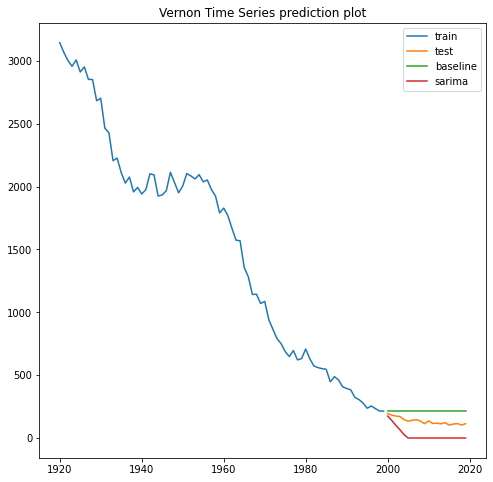

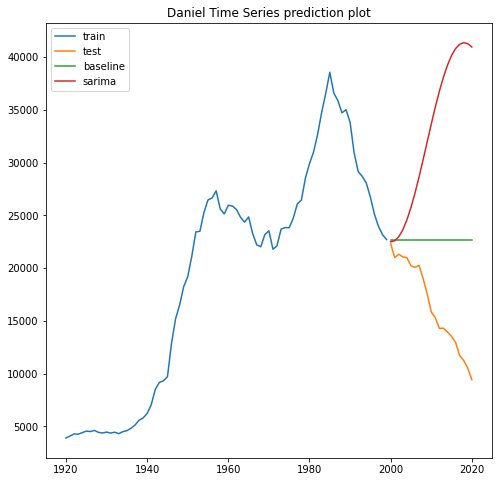

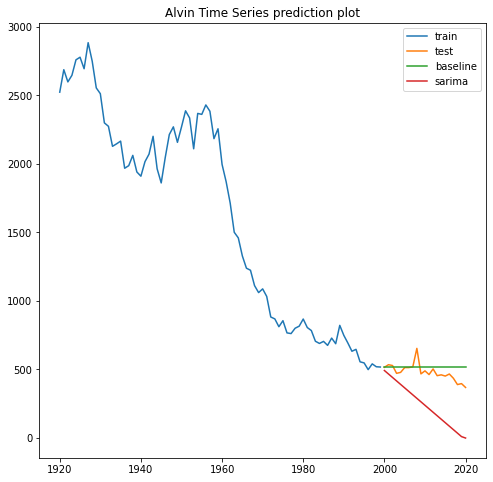

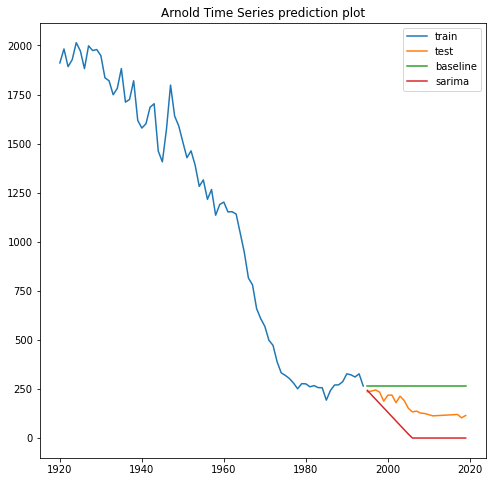

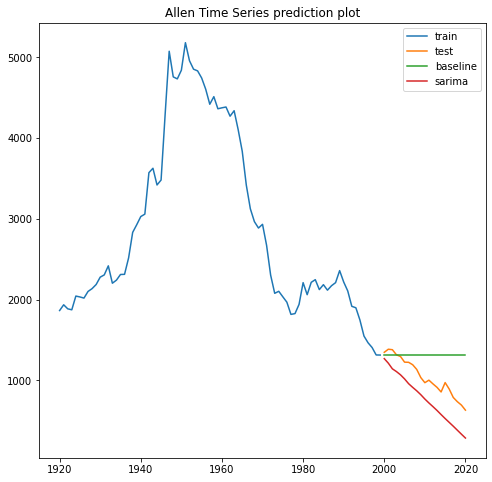

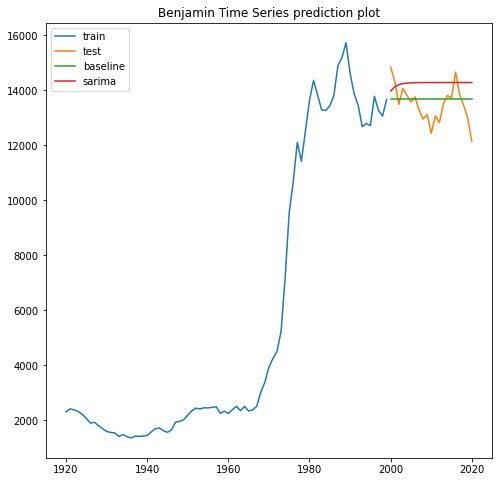

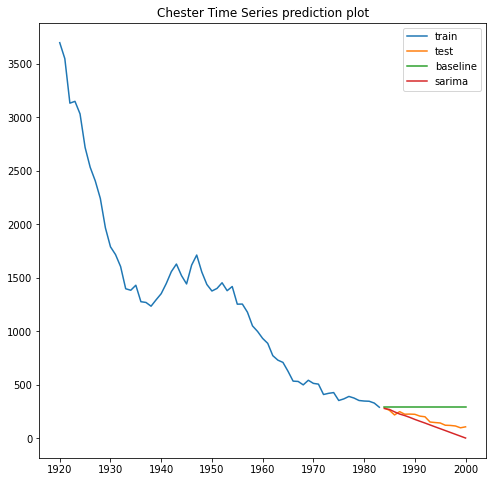

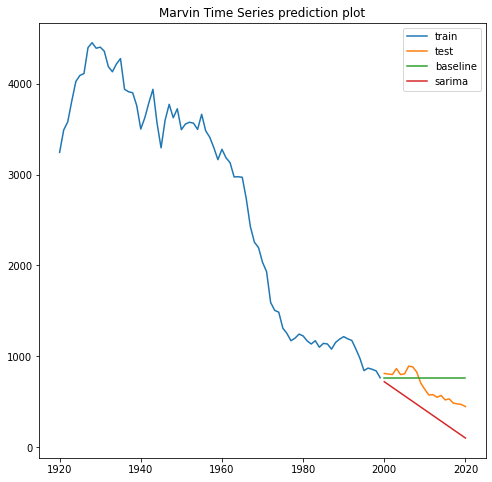

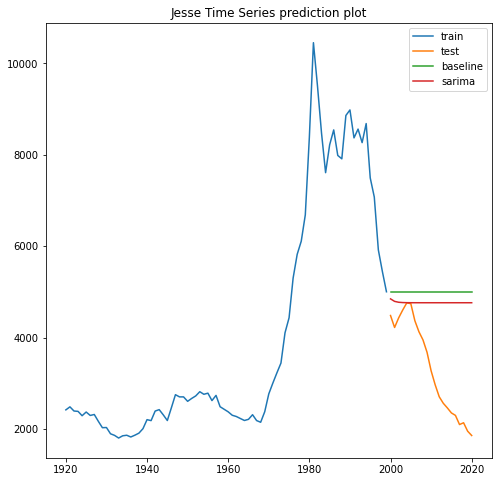

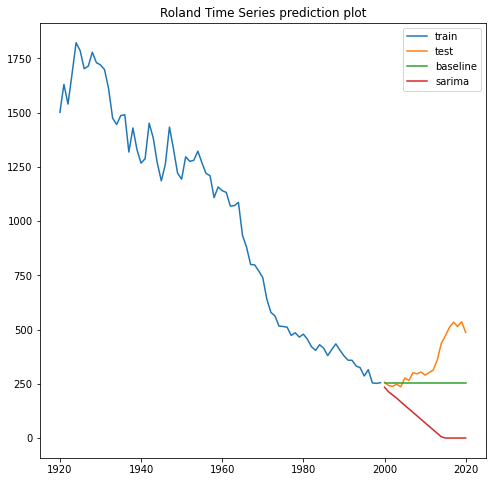

In [34]:
plot_model(smaller_baseline[smaller_baseline["percent diff in mses"]>50]["name"].unique().tolist()[:10], names_100_years)